<a href="https://colab.research.google.com/github/Ximearex/AI/blob/main/AF2_Data_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Assignment 2: Processing Datasets in Python**
---
1929944 - Alejandra Janeth hernandez Grimaldo   

2055629 - Ximena Arellano Arellano              

2109522 - Camila Andrea Silva Espinoza          

2132194 - Jorge Alfonso García Rodriquez        

---



## **Introduction**
Data analysis and processing is an important step in building Machine Learning models since the quality of data directly affects the model's performance. A dataset with missing values or unbalanced distributions can lead to inaccurate models. Therefore, it is essential to perform proper data cleaning and normalization before using it in machine learning algorithms.

We will document the steps taken to process a dataset in order to prepare it for use in a machine learning model. The activity is divided into four key parts, which will help improve data quality and identify patterns and trends for building predictive models. Through different data analysis and transformation techniques, we aim to optimize the representation of information and make it easier for Machine Learning algorithms to work effectively.

---





## **Part 1: Data Loading and Exploration**
In this first part of data processing, we will load the dataset and perform an initial exploration to understand its structure. This will help identify the general shape of the dataset, the available variables, their types, and whether there are any missing or inconsistent values that need to be handled later.

Below is the code needed to import the required libraries, load the CSV file, and make the first observations about the dataset. We use four **import** statements and one **from** statement to include libraries like pandas, numpy, matplotlib, and seaborn, which will be used throughout the activity. These libraries will help manage the data, perform calculations, create visualizations, and apply normalization later.















In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

---
**Display the first few rows of the dataset**

In this section, we use the **df.head()** command to view the first rows of the dataset. This function returns the first five rows, allowing us to quickly check the structure of the dataset, the column names, the data types, and whether there are any obvious abnormal values.  

The table includes variables such as (*Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, and Outcome*), which contain clinical information about the patients. This is a useful way to confirm that the file was loaded correctly and is ready for analysis.

In [ ]:
df = pd.read_csv("diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


---
**Identify null or inconsistent values**

Next, we analyze the presence of null or inconsistent values in the dataset. We use **df.isnull().sum()**, which prints the number of null values in each column, since zeros can appear in variables where this value is not valid. This initial analysis helps identify the variables that need to be handled with replacements, such as the median, to make sure the Machine Learning model is not affected by incorrect or incomplete data.

In [ ]:
print((df == 0).sum())

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


---
**Generate descriptive statistics**

For this next section, we use the command **df.describe()** to generate descriptive statistics of the numerical variables in the dataset. This function shows values like *(the count, mean, standard deviation, minimum, maximum, and the 25%, 50%, and 75% percentiles)*. With this data, we were able to see the distribution of each variable, detect possible outliers, and better understand the range and spread of the values. This makes it an essential tool for making informed decisions during data cleaning and normalization.

In [ ]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  



---



## **Part 2: Data Cleaning and Normalization**

In this part, the data cleaning and subsequent normalization are carried out. First, we identify and replace the zero or null values in the relevant columns to prevent incorrect data from affecting the performance of the Machine Learning model. After that, we normalize the numerical data to ensure that all variables are on the same scale, which is crucial for improving the performance of the machine learning algorithms.

---
**Replace zero values in attribute columns with the median of each column.**

The goal of this section of the process is to replace the zero values in the attribute columns with the median of each corresponding column. This is necessary because, in some columns like (*Glucose, BloodPressure, and BMI)*, a zero value may not be valid or may represent missing data. The code we implemented identifies the columns that contain zero or null values, calculates the median of each column, and replaces all zero values with the calculated median for that column. This ensures that the data is not biased by values that do not represent valid information, which is important for maintaining the quality of the model.

In [ ]:
def replace_zeros_with_median(df, columns):
    for col in columns:
        median_value = df[col][df[col] != 0].median()
        df[col] = df[col].replace(0, median_value)
replace_zeros_with_median(df, zero_columns)

---
**Normalize numerical data using Min-Max Scaling.**

Normalization is an important step in data processing because variables with different scales can negatively affect the model. In this section, we apply the *Min-Max Scaling* technique to scale the numerical data. For this, we implemented a code that uses the **MinMaxScaler()** from the *scikit-learn* library to normalize the values of the numerical columns. It scales the values of the variables between 0 and 1, helping to prevent scale differences between the variables from influencing the Machine Learning algorithms. This improves the performance of the models by ensuring that all variables contribute equally to the analysis.

In [ ]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.iloc[:, :-1]), columns=df.columns[:-1])
df_scaled['Outcome'] = df['Outcome']

In [1]:
print((df == 0).sum())

NameError: name 'df' is not defined

## **Part 3: Data Visualization**
---


To better understand the data distribution and detect possible patterns, we performed different graphical visualizations. These visualizations help interpret the information more intuitively and facilitate the identification of trends, outliers, and correlations between key variables.

**Histogram of glucose levels before and after normalization.**

Normalization is a fundamental step in data preparation for Machine Learning, as it adjusts values to a common scale without altering the overall distribution. To analyze this effect, we generated two comparative histograms of glucose levels before and after normalization:

The first histogram (red color) represents the original distribution of glucose levels in patients.

The second histogram (blue color) shows the same distribution after applying Min-Max Scaling, where values have been rescaled between 0 and 1.

This analysis allows us to verify that the shape of the glucose distribution remains the same but now falls within a standardized range, making it easier to use in Machine Learning models.

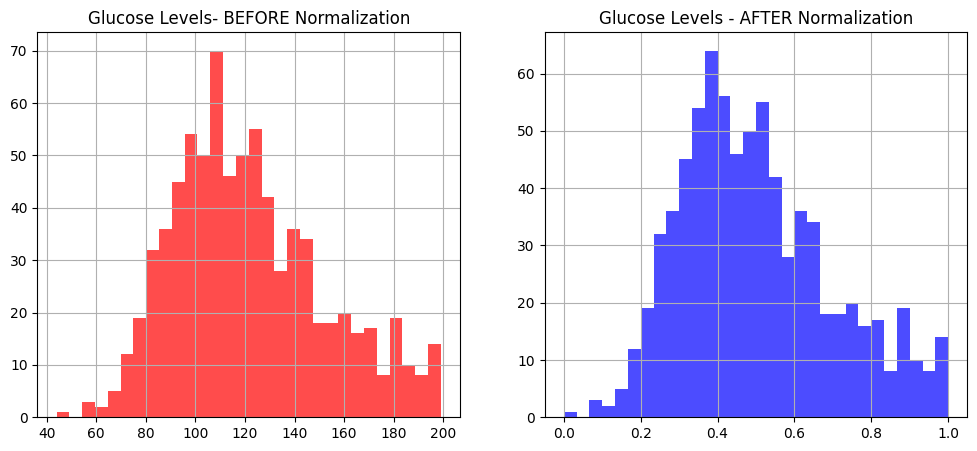

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
df['Glucose'].hist(bins=30, alpha=0.7, color='red', ax=axes[0])
axes[0].set_title("Glucose Levels- BEFORE Normalization")
df_scaled['Glucose'].hist(bins=30, alpha=0.7, color='blue', ax=axes[1])
axes[1].set_title("Glucose Levels - AFTER Normalization")
plt.show()

---
**Boxplot to identify outliers in blood pressure.**

A boxplot was used to analyze the distribution of blood pressure and detect the presence of outliers. The boxplot is a useful tool for visualizing the median, quartiles, and extreme values of a variable.

In this case, possible outliers were identified in blood pressure, indicating that some patients have significantly lower or higher levels than the average. This analysis is crucial, as outliers can negatively impact the performance of predictive models and must be properly handled during preprocessing.

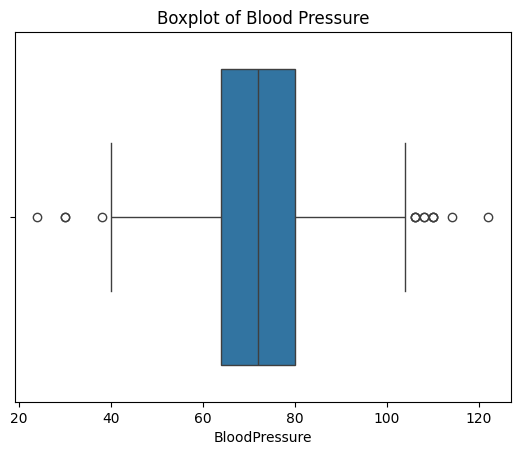

In [ ]:
sns.boxplot(x=df['BloodPressure']).set_title("Boxplot of Blood Pressure")
plt.show()

---
**Scatter plot between Glucose and BMI to analyze correlation.**

To explore the relationship between glucose levels and body mass index (BMI), a scatter plot was used. Each point represents a patient, and the colors indicate whether they have diabetes (1) or not (0).

This graph allows us to visualize whether there is a correlation between these variables, meaning if higher glucose levels tend to be associated with higher BMI. Additionally, it helps observe whether diabetic patients tend to cluster in certain regions of the graph, which could be useful for future predictions.

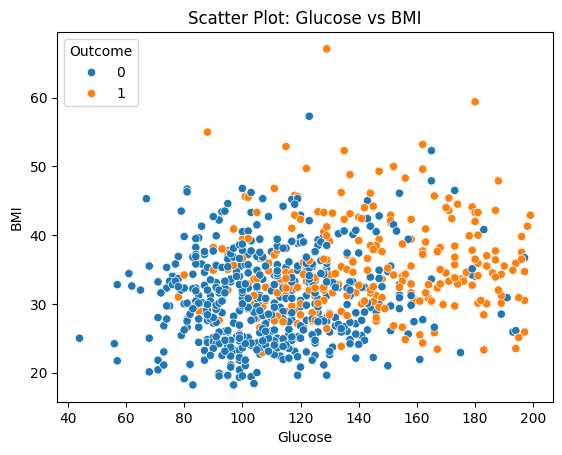

In [ ]:
sns.scatterplot(x=df['Glucose'], y=df['BMI'], hue=df['Outcome']).set(title="Scatter Plot: Glucose vs BMI", xlabel="Glucose", ylabel="BMI")
plt.show()

---
**Bar chart showing the number of patients with and without diabetes (Outcome).**

To understand the distribution of diabetes diagnoses in the dataset, a bar chart was generated, showing the number of patients diagnosed with the disease (Outcome = 1) and those without the disease (Outcome = 0).

This analysis is essential because an imbalanced dataset (with significantly more cases of one type than the other) can affect the performance of the Machine Learning model

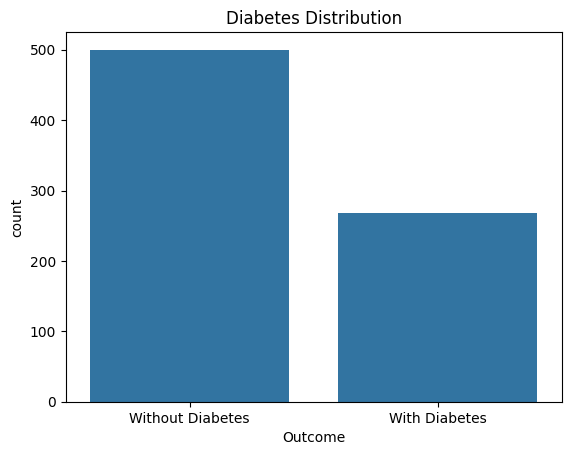

In [ ]:
sns.countplot(x='Outcome', data=df).set(title="Diabetes Distribution")
plt.xticks([0, 1], ['Without Diabetes', 'With Diabetes'])
plt.show()


## **Part 4: Answer the following questions**
---


**What impact do missing values have on data analysis?**

Missing values can be handled incorrectly, causing a distortion of results and potentially biasing conclusions. In this case, if data from patients with a certain disease are missing, the actual prevalence of the disease could be underestimated.

---
***How can we detect and handle outliers in biomedical datasets?***
It is important to detect extreme values before analyzing data and machine learning models. In biomedical datasets, outliers are commonly due to measurement errors. Some ways to detect them include calculating the IQR and considering an outlier if it falls outside the range. In this case, numerical data should be normalized using Min-Max Scaling, as well as using boxplots to visualize extreme values and transforming the data accordingly.

---
***What are some common causes of missing or incorrect data in biomedical studies?***
In most cases, this is due to human errors when incorrectly recording values in databases. It can also result from failures in sensors or medical equipment due to calibration issues, which can produce incorrect measurements.

---
***How does normalizing data improve the performance of Machine Learning models?***
Many machine learning models are sensitive to the magnitude of values, so normalization is necessary to transform the data and ensure all variables have the same scale.

---
***Why is visualizing data an important step before applying Machine Learning models?***
It is very important to understand the data to detect problems and patterns before training a model. This is much easier using visual tools such as boxplots to detect outliers, scatter plots to identify correlations, histograms, etc.

---
***Why is preprocessing critical when working with medical datasets?***
Preprocessing is especially critical in medical datasets because health-related decisions are made based on this data. If the data is not properly cleaned and processed, it can lead to misdiagnoses, incorrect treatments, and even risks to patient safety. Unlike other types of data, medical data directly impacts people's well-being, so accuracy and reliability are fundamental.

---
***What ethical concerns should be considered when handling patient data?***
Handling medical data has significant ethical implications, such as privacy and confidentiality. Patients must authorize the use of their data, and biases in AI models should be avoided by ensuring they are not trained solely on data from a single racial or age group.

# **CONCLUSION**
The processing and analysis of biomedical data is a fundamental step before applying Machine Learning models, as data quality directly impacts the accuracy and reliability of the results. Throughout this work, key aspects such as detecting and handling missing values, identifying outliers, normalizing data, and the importance of visualization before modeling have been explored.

One of the most critical points in using medical data is its impact on patient health. Incorrect analysis or a biased model can lead to misdiagnoses, inadequate treatments, or erroneous medical decisions, highlighting the importance of rigorous preprocessing. Additionally, handling this data involves important ethical considerations, such as privacy, confidentiality, and fairness in predictive models.

Ultimately, this work reinforces the idea that the success of a Machine Learning model does not solely depend on the algorithms used but primarily on the quality and preparation of the data. Proper preprocessing not only enhances model performance but also ensures that the decisions derived from it are reliable, fair, and safe for medical applications.